# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


## Load the dataset and show the basic information

In [ ]:
import pandas as pd

data = pd.read_csv('loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [ ]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column are missing, the column should be removed from the data frame;
2. For a categorical column, if a row contains a missing value, you need to delete the whole row;
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [ ]:
# Dropping columns with more than 50% missing values
loan_approval_data_cleaned = data.drop(columns=['RiskScore'])


# Dropping rows with missing values in categorical columns
loan_approval_data_cleaned = loan_approval_data_cleaned.dropna(subset=['MaritalStatus'])

# Imputing missing values in numerical columns with the mean

loan_approval_data_cleaned['Age'] = loan_approval_data_cleaned['Age'].fillna(loan_approval_data_cleaned['Age'].mean())

loan_approval_data_cleaned.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1


### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [ ]:
# Identifying categorical columns

categorical_columns = loan_approval_data_cleaned.select_dtypes (include=['object']).columns

# Dropping columns where all values are unique

unique_values_counts = loan_approval_data_cleaned[categorical_columns].nunique()

columns_to_drop = unique_values_counts[unique_values_counts == loan_approval_data_cleaned.shape[0]].index
loan_approval_data_cleaned = loan_approval_data_cleaned.drop(columns=columns_to_drop)

# Applying one-hot encoding
loan_approval_data_encoded = pd.get_dummies(loan_approval_data_cleaned, drop_first=True)

loan_approval_data_encoded.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,45.0,39948,617,22,13152,48,2,183,0.354418,1,...,True,False,False,False,True,False,False,False,True,False
1,38.0,39709,628,15,26045,48,1,496,0.087827,5,...,False,True,False,False,False,False,True,False,False,False
2,47.0,40724,570,26,17627,36,2,902,0.137414,2,...,True,False,False,False,False,True,False,True,False,False
3,58.0,69084,545,34,37898,96,1,755,0.267587,2,...,False,True,False,False,False,False,False,False,True,False
4,37.0,103264,594,17,9184,36,1,274,0.320535,0,...,True,False,False,False,False,False,True,False,False,False


## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


X = loan_approval_data_encoded.drop(columns=['LoanApproved'])
y = loan_approval_data_encoded ['LoanApproved']


#Splitting the data

student_id = 48673366
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=student_id)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [ ]:
logistic_model = LogisticRegression (max_iter=5000, random_state=student_id) # Setting max itteration to be 5000
logistic_model.fit(X_train_scaled, y_train)


# Predicting on training and testing sets
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)


# Calculating accuracy and F1-score
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)


print(f"Training Accuracy: {train_accuracy}, Training F1: {train_f1}")
print(f"Testing Accuracy: {test_accuracy}, Testing F1: {test_f1}")



Training Accuracy: 0.965891959798995, Training F1: 0.9277445109780439
Testing Accuracy: 0.9670854271356784, Testing F1: 0.9315211709357031


### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Initialize lists to hold accuracy and F1 scores
accuracy_scores = []
f1_scores = []

# Initialize the model (you can use Logistic Regression or any other model)
model = LogisticRegression()

# We will use RFE to reduce features one by one
for i in range(1, X_train_scaled.shape[1] + 1):  # Loop over the number of features (from 1 to the total number of features)

    # Initialize RFE with the current number of features to select
    rfe = RFE(model, n_features_to_select=i)

    # Fit RFE on the training data
    rfe.fit(X_train_scaled, y_train)

    # Use the selected features to make predictions on the test set
    y_pred = rfe.predict(X_test_scaled)

    # Calculate accuracy and F1 score for the current number of features
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the scores to the respective lists
    accuracy_scores.append(acc)
    f1_scores.append(f1)

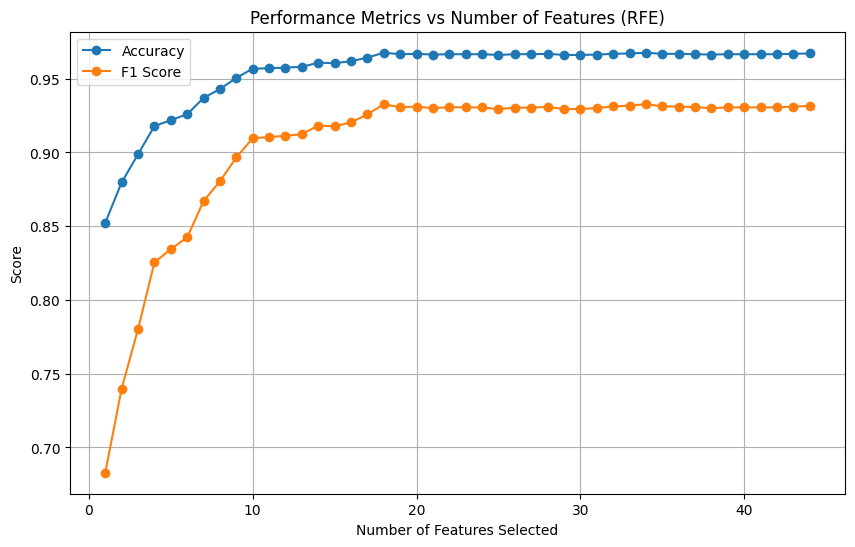

In [ ]:
# Plotting the performance metrics as a function of the number of features.
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_train_scaled.shape[1] + 1), accuracy_scores, label='Accuracy', marker='o')
plt.plot(range(1, X_train_scaled.shape[1] + 1), f1_scores, label='F1 Score', marker='o')

plt.title('Performance Metrics vs Number of Features (RFE)')
plt.xlabel('Number of Features Selected')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

## Task 3: Build a KNN classification model (25 marks)

### Step 3.1 Build 1-NN classifier (5 marks)
1. Slect the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initializing 1-NN classifier
knn_1nn_model = KNeighborsClassifier(n_neighbors=1)

# Training the model
knn_1nn_model.fit(X_train_scaled, y_train)

# Predicting on training and testing sets
y_train_pred_knn = knn_1nn_model.predict(X_train_scaled)  # Fix: Correct variable name
y_test_pred_knn = knn_1nn_model.predict(X_test_scaled)

# Calculating accuracy and F1-score
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)  # Fix: Add missing '='
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
train_f1_knn = f1_score(y_train, y_train_pred_knn)
test_f1_knn = f1_score(y_test, y_test_pred_knn)

# Fixing the print statements
print(f"1-NN Training Accuracy: {train_accuracy_knn}, F1: {train_f1_knn}")
print(f"1-NN Testing Accuracy: {test_accuracy_knn}, F1: {test_f1_knn}")

1-NN Training Accuracy: 1.0, F1: 1.0
1-NN Testing Accuracy: 0.8062814070351759, F1: 0.5821138211382114


### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the range for K (1 to 30)
param_grid = {'n_neighbors': range(1, 31)}

#Initializing the KNN model
knn_model = KNeighborsClassifier()

# Initializing GridSearchCV with 5-fold cross-validation and accuracy as the scoring metric
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

#Fitting the grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

#Getting the best K value and its corresponding accuracy
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_


print (f"Best K: {best_k}")
print (f"Best Cross-Validated Accuracy: {best_accuracy}")

Best K: 17
Best Cross-Validated Accuracy: 0.8704773869346732


### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?

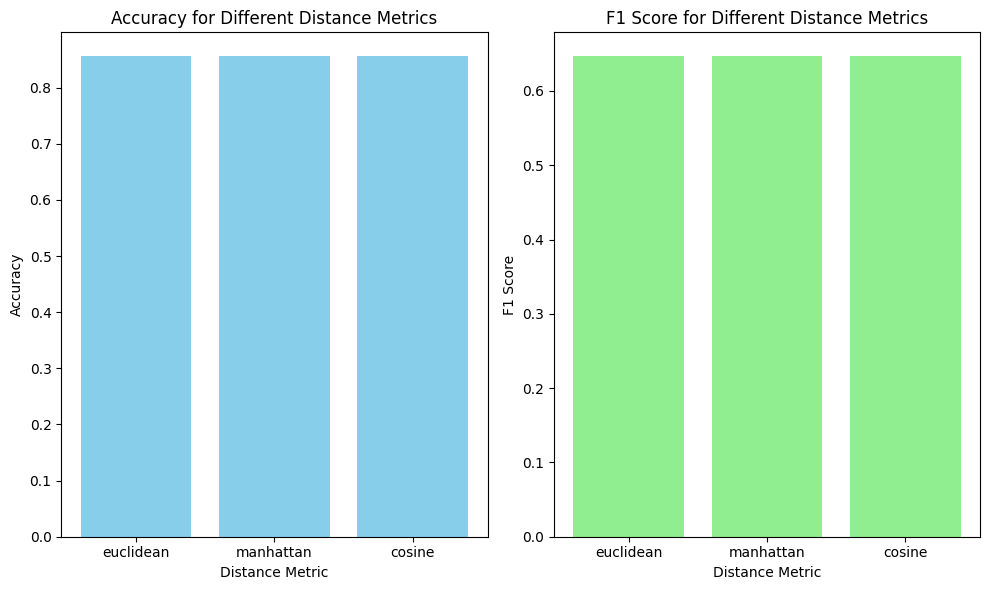

In [ ]:
# Defining different distance metrics
distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Initializing lists to store the performance metrics

accuracy_scores = []
f1_scores = []

# Looping through the distance metrics and evaluate the model

for metric in distance_metrics:

  krnin_model = KNeighborsClassifier(n_neighbors=best_k, metric=metric) # Using best K from grid search
  knn_model.fit(X_train_scaled, y_train)

  #Predicting on the test data
  y_test_pred = knn_model.predict(X_test_scaled)

  # Calculating accuracy and F1-score for the current metric
  accuracy = accuracy_score (y_test, y_test_pred)
  f1 = f1_score(y_test, y_test_pred)

  #Storing the results
  accuracy_scores.append(accuracy)
  f1_scores.append(f1)

# Visualizing the performance using a bar chart
metrics = ['Accuracy', 'F1 Score']

plt.figure(figsize=(10, 6))

# Bar chart for accuracy
plt.subplot(1, 2, 1)
plt.bar(distance_metrics, accuracy_scores, color='skyblue')
plt.title('Accuracy for Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')

# Bar chart for F1 score

plt.subplot(1, 2, 2)
plt.bar(distance_metrics, f1_scores, color='lightgreen')
plt.title('F1 Score for Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

Analysis 2

The Logistic Regression Model
20% was set aside for testing and the remaining 80% for training. In order to make sure that every feature was scaled equally, a StandardScaler was used.
After training, the model's performance was assessed using the F1-Score in addition to accuracy.

Elimination of Recursive Features (RFE):
At each stage, the model underwent retraining as the least significant elements were gradually eliminated. We tracked changes in the accuracy and F1-Score to evaluate how the model performed.

Analysis 3
Analysis of K-Nearest Neighbors (KNN):

1. Neighbor classifier:
To begin, we trained a simple KNN model by predicting based just on the closest data point. By examining the accuracy and F1-score of a basic version of KNN, this allowed us to better understand how it functions on the dataset.

2.Tuning K using Grid Search:
We employed grid search in conjunction with cross-validation to determine the model's optimal number of neighbors (K). This is important since the model's performance depends on the choice of K; too few neighbors might result in overfitting, while too many neighbors can cause underfitting. Adjusting K increased the accuracy of the model.

3.Impact of Distance Metrics:
We investigated the effects of several distance metrics on the KNN model's performance, including Euclidean, Manhattan, and Cosine. Every metric has a different technique of measuring distance, therefore each one affects how the model classifies data. We displayed each metric's accuracy and F1-score graphically to demonstrate how different distance metrics can affect a model's performance.